# __05 Supervised Learning__

Machine learning involves coding programs that automatically adjust their perfor-
mance in accordance with their exposure to information in data. This learning is
achieved via a parameterized model with tunable parameters that are automatically
adjusted according to different performance criteria. Machine learning can be con-
sidered a subfield of artificial intelligence (AI) and we can roughly divide the field
into the following three major classes.

- __Supervised Learning__: Algorithms which learn from a training set of labeled
  examples (exemplars) to generalize to the set of all possible inputs. Examples
  of techniques in supervised learning:
    - logistic regression
    - support vector machines
    - decision trees
    - random forest
    - etc
- __Unsupervised Learning__: Algorithms that learn from a training set of unlabeled
  examples. Used to explore data according to some statistical, geometric or
  similarity criterion. Examples of unsupervised learning include:
    - k-means clustering
    - kernel density estimation
    - etc
- __Reincforcement learning__: Algorithms that learn via reinforcement from
  criticism that provides information on the quality of a solution, but not
  on how to improve it. Improved solutions are achieved by iteratively
  exploring the solution space.
 

### __The Problem__

In this chapter we use data from the Lending Club to develop our understanding of
machine learning concepts. The Lending Club is a peer-to-peer lending company.
It offers loans which are funded by other people. In this sense, the Lending Club
acts as a hub connecting borrowers with investors. The client applies for a loan of a
certain amount, and the company assesses the risk of the operation. If the application
is accepted, it may or may not be fully covered. We will focus on the prediction
of whether the loan will be fully funded, based on the scoring of and information
related to the application.
We will use the partial dataset of period 2007–2011. Framing the problem a little
bit more, based on the information supplied by the customer asking for a loan, we
want to predict whether it will be granted up to a certain threshold thr . The attributes
we use in this problem are related to some of the details of the loan application, such
as amount of the loan applied for the borrower, monthly payment to be made by
the borrower if the loan is accepted, the borrower’s annual income, the number of
incidences of delinquency in the borrower’s credit file, and interest rate of the loan,
among others.
In this case we would like to predict unsuccessful accepted loans. A loan applica-
tion is unsuccessful if the funded amount (funded_amnt) or the amount funded
by investors (funded_amnt_inv) falls far short of the requested loan amount
(loan_amnt). That is,

$$ \frac{loan - funded}{loan} \ge 0.95$$

Note that in this problem we are predicting a binary value: either the loan is fully
funded or not. Classification is the natural choice of machine learning tools for
prediction with discrete known outcomes. According to the cardinality of the target
set, one usually distinguishes between binary classifiers when the target output only
takes two values, i.e., the classifier answers questions with a yes or a no; or multiclass
classifiers, for a larger number of classes. This issue is important in that not all
methods can naturally handle the multiclass setting.

In a formal way, classification is regarded as the problem of finding a function 
$ h(\mathbf{x}) = \mathbb{R}^d \rightarrow \mathbb{K}$ that maps an input space in $\mathbb{R}^d$
onto a discrete set of k target outputs or classes $\mathbb{K} = \{1, 2, ..., k\}$.
In this setting, the features are arranged as a vector $\mathbf{x}$ of $d$ real-valued numbers.

We can encode both target states in a numerical variable, e.g., a successful
loan target can take value +1; -1 otherwise.

In [23]:
import pickle
ofname = open('input/dataset_small.pkl', 'br')


(x, y) = pickle.load(ofname, encoding = 'bytes')

In [26]:
dims = x.shape[1]
N = x.shape[0]
print(f'dims: {dims}, samples: {N}')

dims: 15, samples: 4140


Considering data arranged as in the previous matrices we refer to:
- The columns as features, attributes, dimensions, regressors, covariates, predictors
  or independent variables.
- the rows as instances, examples or samples
- the target as the label, outcome, response or dependent variable.


In [27]:
# apply sk-learn libraries
from sklearn import neighbors
from sklearn import datasets

# create an isntance of k-nearest neighbor classifier
knn = neighbors.KNeighborsClassifier(n_neighbors = 11)

# train the classifier
knn.fit(x, y)

# compute the prediction according to the model
y_hat = knn.predict(x)

# check results
print(f'predicted value: {y_hat[-1]}, real target: {y[-1]}')

predicted value: -1.0, real target: -1.0


The basic measure of performance of a classifier is its accuracy. This is defined as
the number of correctly predicted examples divided by the total amount of examples.

$$ acc = \frac{\mbox{Number of correct predictions}}{n} $$

Each estimator has a score() method that invokes the default scoring metric.
In the case of k-nearest neighbors, this is the classification accuracy.

In [28]:
knn.score(x, y)

0.8316425120772947

It looks like a really good result. But how good is it? Let us first understand a little
bit more about the problem by checking the distribution of the labels.
Let us load the dataset and check the distribution of labels:

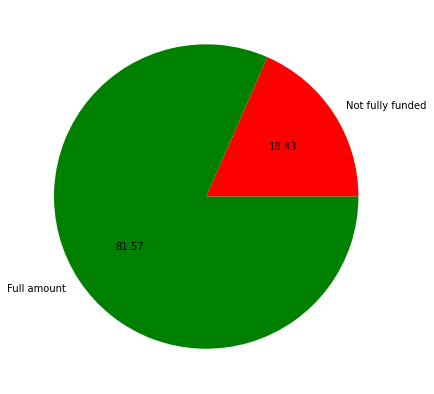

In [29]:
import numpy as np
import matplotlib.pyplot as plt

plt.pie(
    np.c_[np.sum(np.where(y == 1, 1, 0)), np.sum(np.where(y == -1, 1, 0))][0],
    labels = ['Not fully funded', 'Full amount'],
    colors = ['r', 'g'],
    shadow = False,
    autopct = '%.2f'
)
plt.gcf().set_size_inches((7, 7))

ith the result observed in Fig. 5.1.
Note that there are far more positive labels than negative ones. In this case, the
dataset is referred to as unbalanced. This has important consequences for a classifier
as we will see later on. In particular, a very simple rule such as always predict the
majority class, will give us good performance. In our problem, always predicting
that the loan will be fully funded correctly predicts 81.57% of the samples. Observe
that this value is very close to that obtained using the classifier.
Although accuracy is the most normal metric for evaluating classifiers, there are
cases when the business value of correctly predicting elements from one class is
different from the value for the prediction of elements of another class. In those
cases, accuracy is not a good performance metric and more detailed analysis is
needed. The confusion matrix enables us to define different metrics considering such
scenarios. The confusion matrix considers the concepts of the classifier outcome and
the actual ground truth or gold standard. In a binary problem, there are four possible
cases:

* __True Positives (TP)__: When the classifier predicts a sample as positive
  and it really is positive.
* __False Positives (FP)__: When the classifier predicts a sample as positive
  but in fact it is negative.
* __True Negative (TN)__: When the classifier predicts a sample as negative
  and it really is negative
* __False Negative (FN)__: When the classifier predicts a sample as negative
  but in fact it is positive.
  

<img src="images/conmatr.png">,

A combination of these elements allows us to define several perfromance metrics:
- _Accuracyy_:
$$ \mbox{accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

- Column-wise we find these two partial performance emtrics:
    - _Sensitivity_ or _Recall_:
    $$ \mbox{sensitivity} = \frac{TP}{\mbox{Real Positives}} = \frac{TP}{TP + FN} $$
    - _Specificity_:
    $$ \mbox{specificity} = \frac{TN}{\mbox{Real Negatives}} = \frac{TP}{TN + FP} $$
    
- Row-wise we find these two partial performance emtrics:
    - _Precision or Positive Predictive Value_:
    $$ \mbox{precision} = \frac{TP}{\mbox{Predicted Positives}} = \frac{TP}{TP + FP} $$
    - _Negative Predictive Value_:
    $$ \mbox{NPC} = \frac{TN}{\mbox{Predicted Negatives}} = \frac{TP}{TN + FN} $$

These partial performance metrics allow us to answer questions concerning how
often a classifier predicts a particular class, e.g., what is the rate of predictions for
not fully funded loans that have actually not been fully funded? This question is
answered by recall. In contrast, we could ask: Of all the fully funded loans predicted
by the classifier, how many have been fully funded? This is answered by the precision
metric.

In [31]:
from sklearn import metrics
metrics.confusion_matrix(y_hat, y)

array([[3370,  690],
       [   7,   73]])

Let us check the following example. Let us select a nearest neighbor classifier
with the number of neighbors equal to one instead of eleven, as we did before, and
check the training error.

In [32]:
# train a classifier
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn.fit(x, y)
y_hat = knn.predict(x)

print(f'accuracy: {metrics.accuracy_score(y_hat, y)}')
print(f'confusion matrix:\n{metrics.confusion_matrix(y_hat, y)}')

accuracy: 1.0
confusion matrix:
[[3377    0]
 [   0  763]]


The performance measure is perfect! 100% accuracy and a diagonal confusion
matrix! This looks good. However, up to this point we have checked the classifier
performance on the same data it has been trained with. During exploitation, in real
applications, we will use the classifier on data not previously seen. Let us simulate
this effect by splitting the data into two sets: one will be used for learning (training
set) and the other for testing the accuracy (test set).

In [33]:
# simulate a real case: Randomize and split data into
# two subsets PRC * 100 \% for training and the rest
# (1 - PRC) * 100 \% for testing
perm = np.random.permutation(y.size)
PRC = 0.7
split_point = int(np.ceil(y.shape[0] * PRC))

X_train = x[perm[:split_point].ravel(), :]
y_train = y[perm[:split_point].ravel()]

X_test = x[perm[split_point:].ravel(), :]
y_test = y[perm[split_point:].ravel()]

In [39]:
# let's train the model with this new partition
# train a classifier on training data
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_hat = knn.predict(X_train)

print('training stats:')
print(f'classification accuracy: {metrics.accuracy_score(y_train, y_hat)}')
print(f'confusion matrix:\n{metrics.confusion_matrix(y_train, y_hat)}')

training stats:
classification accuracy: 1.0
confusion matrix:
[[2368    0]
 [   0  530]]


As expected from the former experiment, we achieve a perfect score. Now let us
see what happens in the simulation with previously unseen data

In [38]:
# check on the test set
y_hat = knn.predict(X_test)

print('training stats:')
print(f'classification accuracy: {metrics.accuracy_score(y_test, y_hat)}')
print(f'confusion matrix:\n{metrics.confusion_matrix(y_test, y_hat)}')

training stats:
classification accuracy: 0.7471819645732689
confusion matrix:
[[854 155]
 [159  74]]


A good simulation for approximating the test error is to run this process many times and average the performances.

In [42]:
# splitting done by using the tools provided by sklearn
from sklearn.model_selection import train_test_split

PRC = 0.3
acc = np.zeros((10,))
for i in range(0, 10):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = PRC)
    knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train, y_train)
    y_hat = knn.predict(X_test)
    acc[i] = metrics.accuracy_score(y_hat, y_test)
    
acc.shape = (1, 10)
print(f'mean expected error: {np.mean(acc[0]):.3F}')

mean expected error: 0.756


As we can see, the resulting error is below 81%, which was the result of the most
naive decision process. What is wrong with this result?
Let us introduce the nomenclature for the quantities we have just computed and
define the following terms.

- __In-sample error__ $E_{in}$: The in.sample error or training error is the error
  measured over all the observed data samples in the training set, i.e.,
  
  $$ E_{in} = \frac{1}{N}\sum_{i = 1}^{N} e(x_i, y_i) $$
  
- __Out-of-sample error__ $E_{out}: he out-of-sample error or generalization error mea-
    sures the expected error on unseen data. We can approximate/simulate this quantity
    by holding back some training data for testing purposes.
   
  $$ E_{out} = \mathbb{E}_{x, y} (e(x, y)) $$
  
Note that the definition of the instantaneous error e(x i , y i ) is still missing. For
example, in classification we could use the indicator function to account for a cor-
rectly classified sample as follows:

$$ e(x_i, y_i) = I[h(x_i) = y_i] = \begin{cases}
        \begin{array}{lcl}
        1, \mbox{if  } h(x_i) = y_i \\
        0 \mbox{  otherwise}
        \end{array}
\end{cases}  $$

Observe that:

$$  E_{out} \ge E_{in} $$

In [47]:
# select "best model" by choosing the one with
# lowest error rate
from sklearn import tree
from sklearn import svm

PRC = 0.1
acc_r = np.zeros((10, 4))

for i in range(0, 10):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = PRC)
    nn1 = neighbors.KNeighborsClassifier(n_neighbors = 1)
    nn3 = neighbors.KNeighborsClassifier(n_neighbors = 3)
    svc = svm.SVC()
    dt = tree.DecisionTreeClassifier()
    
    nn1.fit(X_train, y_train)
    nn3.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    
    yhat_nn1 = nn1.predict(X_test)
    yhat_nn3 = nn3.predict(X_test)
    yhat_svc = svc.predict(X_test)
    yhat_dt = dt.predict(X_test)
    
    acc_r[i][0] = metrics.accuracy_score(yhat_nn1, y_test)
    acc_r[i][1] = metrics.accuracy_score(yhat_nn3, y_test)
    acc_r[i][2] = metrics.accuracy_score(yhat_svc, y_test)
    acc_r[i][3] = metrics.accuracy_score(yhat_dt, y_test)

In [48]:
acc_r

array([[0.7705314 , 0.7826087 , 0.80917874, 0.7705314 ],
       [0.7705314 , 0.78985507, 0.80434783, 0.7705314 ],
       [0.79951691, 0.80434783, 0.83816425, 0.79951691],
       [0.74637681, 0.78985507, 0.80434783, 0.7826087 ],
       [0.77294686, 0.82125604, 0.84299517, 0.78502415],
       [0.75362319, 0.78743961, 0.81642512, 0.76811594],
       [0.75362319, 0.77294686, 0.78743961, 0.82608696],
       [0.74396135, 0.76570048, 0.78985507, 0.74637681],
       [0.74637681, 0.79227053, 0.8115942 , 0.76086957],
       [0.7705314 , 0.79951691, 0.82125604, 0.7705314 ]])

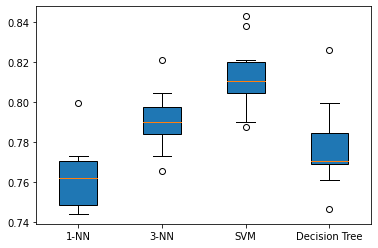

In [66]:
plt.boxplot(
    acc_r, whis=True,
    showcaps=True,
    labels=('1-NN', '3-NN', 'SVM', 'Decision Tree'),
    patch_artist=True,
)
plt.show()